# Introducción a Problemas de Clasificación con Machine Learning

## Información del dataset y contexto

**Conjunto de datos de calidad del aire para clasificación ADL (*Activities of Daily Living*)**

`Gambi, Ennio (2020), “Air Quality dataset for ADL classification”, Mendeley Data, V1, doi: 10.17632/kn3x9rz3kd.1`

La variación en la concentración de gas interior a lo largo del tiempo se monitorea y los datos se almacenan para usar esta información para evaluar el tipo de actividad realizada en la habitación. Gracias al uso de inteligencia artificial, se evitó un enfoque cuantitativo para determinar la concentración de gas, que habría requerido una cuidadosa calibración de los sensores. El conjunto de datos contiene los valores adquiridos por una matriz de 6 sensores de bajo costo en instantes sucesivos de tiempo, y los valores almacenados están asociados con la acción particular que los generó. A través de un procesamiento de datos apropiado, basado en algoritmos de aprendizaje automático, después de una fase de capacitación inicial, es posible reconocer las acciones que se llevan a cabo dentro del hogar. La presencia de productos químicos en el aire se determina a través de una serie de sensores de gas electroquímicos que se han seleccionado en función de las especificaciones técnicas establecidas sobre la capacidad de detectar clases de compuestos. El conjunto de sensores se puede agrupar en dos categorías principales:
- Sensores MQ ( MQ2, MQ9, MQ135, MQ137, MQ138 ) que tienen gran sensibilidad, baja latencia y bajo costo; cada sensor puede responder a diferentes gases;
- Sensor analógico de gas CO2 ( MG-811 ) que tiene una excelente sensibilidad al dióxido de carbono y apenas se ve afectado por la temperatura y la humedad del aire.

El conjunto de datos contiene 1845 muestras recolectadas que describen 4 situaciones objetivo:

1. Situación normal - Actividad: aire limpio, una persona que duerme o estudia
o descansa - Muestras: 595.
2. Preparación de comidas - Actividades: cocinar carne o pasta, verduras fritas. Una o dos personas en la habitación, circulación de aire forzado - Muestras: 515.
3. Presencia de humo - Actividad: quemar papel y madera por un corto período de tiempo en una habitación con ventanas y puertas cerradas - Muestras: 195.
4. Limpieza - Actividad: uso de detergentes en aerosol y líquidos con amoníaco y / o alcohol. La circulación de aire forzado se puede activar o desactivar - Muestras: 540.

Cada muestra está compuesta por 7 valores; los primeros seis valores son las salidas del sensor, mientras que el último es el índice de la acción que generó los valores adquiridos por los sensores. Las cuatro situaciones diferentes están asociadas con una composición del aire bastante diferente, teniendo en cuenta que cualquier actividad produce sustancias químicas (respiración humana, exhalaciones de procesos metabólicos, liberación de volátiles por combustión y/o oxidación, evaporación de detergentes domésticos, etc.).

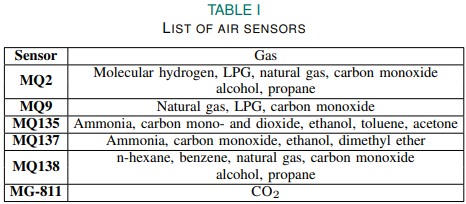

## Librerías Generales

In [1]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Análisis Exploratorio de Datos

In [2]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t" -O dataset_ADL_clasificacion.zip

--2023-11-08 18:49:54--  https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t
Resolving drive.google.com (drive.google.com)... 74.125.196.101, 74.125.196.139, 74.125.196.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s263l68knnr96vvsrde4i01gnvldjhfq/1699469325000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=b2d3ba48-de0d-446b-a0b4-d0b510ef4be1 [following]
--2023-11-08 18:49:55--  https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s263l68knnr96vvsrde4i01gnvldjhfq/1699469325000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=b2d3ba48-de0d-446b-a0b4-d0b510ef4be1
Resolving doc-04-9c-docs.googleusercontent.com (doc-04-9c-docs.googleusercontent.com)... 74.125.196.

In [3]:
!unzip dataset_ADL_clasificacion.zip

Archive:  dataset_ADL_clasificacion.zip
replace dataset_ADL_clasificacion.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset_ADL_clasificacion.csv  


In [4]:
# Lectura del dataset
dataset = pd.read_csv("dataset_ADL_clasificacion.csv")

In [5]:
dataset

,MQ2,MQ9,MQ135,MQ137,MQ138,MG-811,Situacion
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [6]:
dataset.info()
# No hay valores faltantes, todos son valores enteros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MQ2        1845 non-null   int64
 1   MQ9        1845 non-null   int64
 2   MQ135      1845 non-null   int64
 3   MQ137      1845 non-null   int64
 4   MQ138      1845 non-null   int64
 5   MG-811     1845 non-null   int64
 6   Situacion  1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


In [7]:
dataset.describe()
# Notar que los rangos cambian según el tipo de sensor
# Esto se puede escalar/normalizar

,MQ2,MQ9,MQ135,MQ137,MQ138,MG-811,Situacion
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,587.458537,653.465583,1166.036856,1609.279675,1302.121951,2246.295935,2.368564
std,190.456217,173.360131,208.791130,118.820436,279.456215,181.001073,1.209905
min,263.000000,346.000000,753.000000,1323.000000,773.000000,1797.000000,1.000000
25%,430.000000,517.000000,995.000000,1508.000000,1086.000000,2137.000000,1.000000
50%,551.000000,622.000000,1162.000000,1610.000000,1264.000000,2265.000000,2.000000
75%,713.000000,746.000000,1309.000000,1693.000000,1553.000000,2372.000000,4.000000
max,1266.000000,1388.000000,1738.000000,1926.000000,1948.000000,2703.000000,4.000000


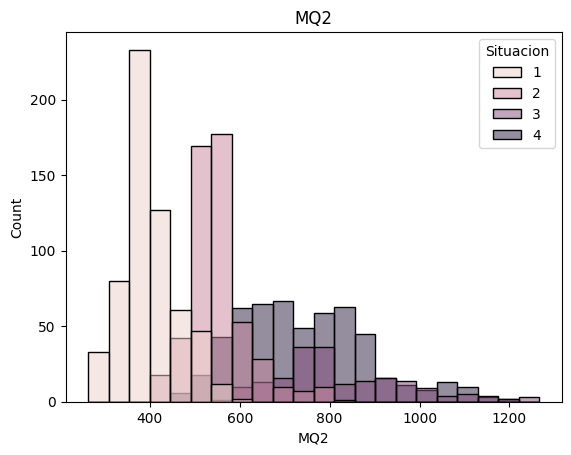

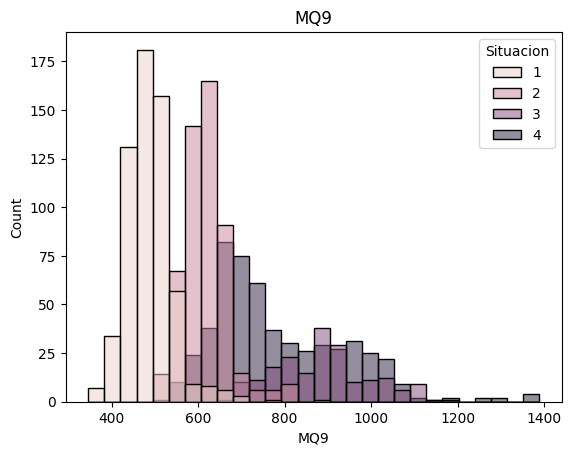

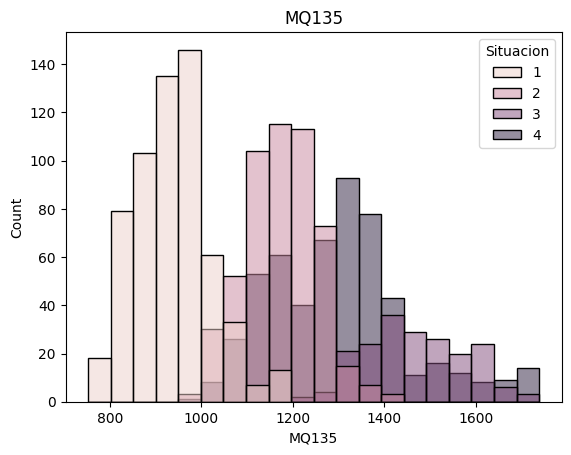

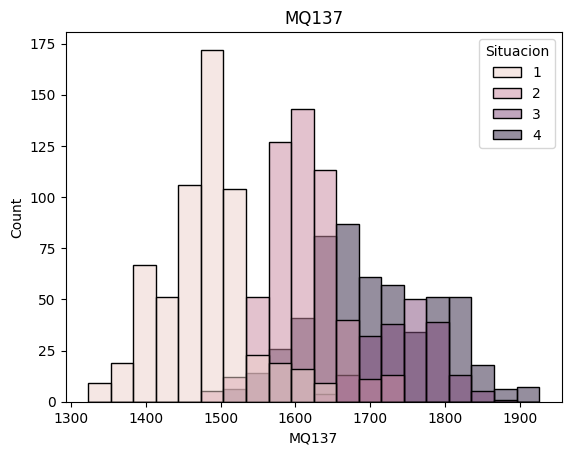

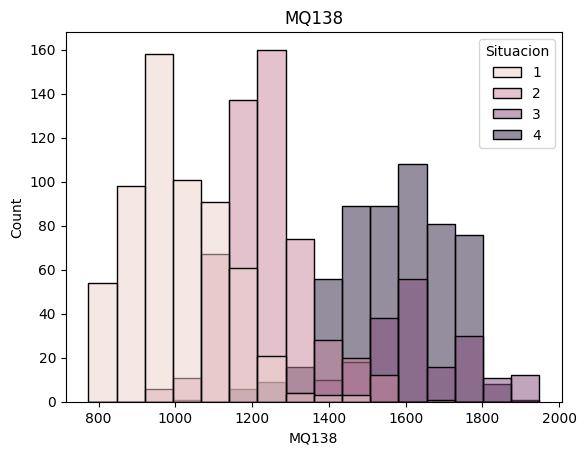

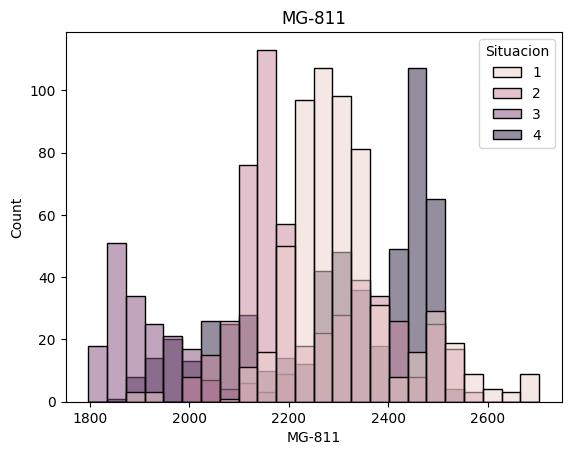

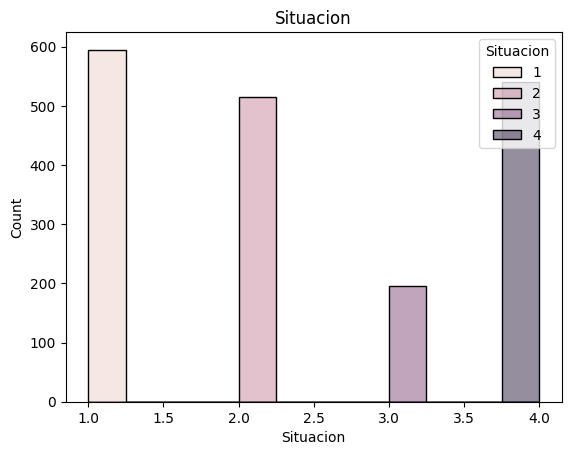

In [8]:
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='Situacion')
    plt.show()

# A simple vista pareciera que las clases no se separan fácilmente por umbrales en las variables de entrada
# Hay un desbalance en las clases de salida

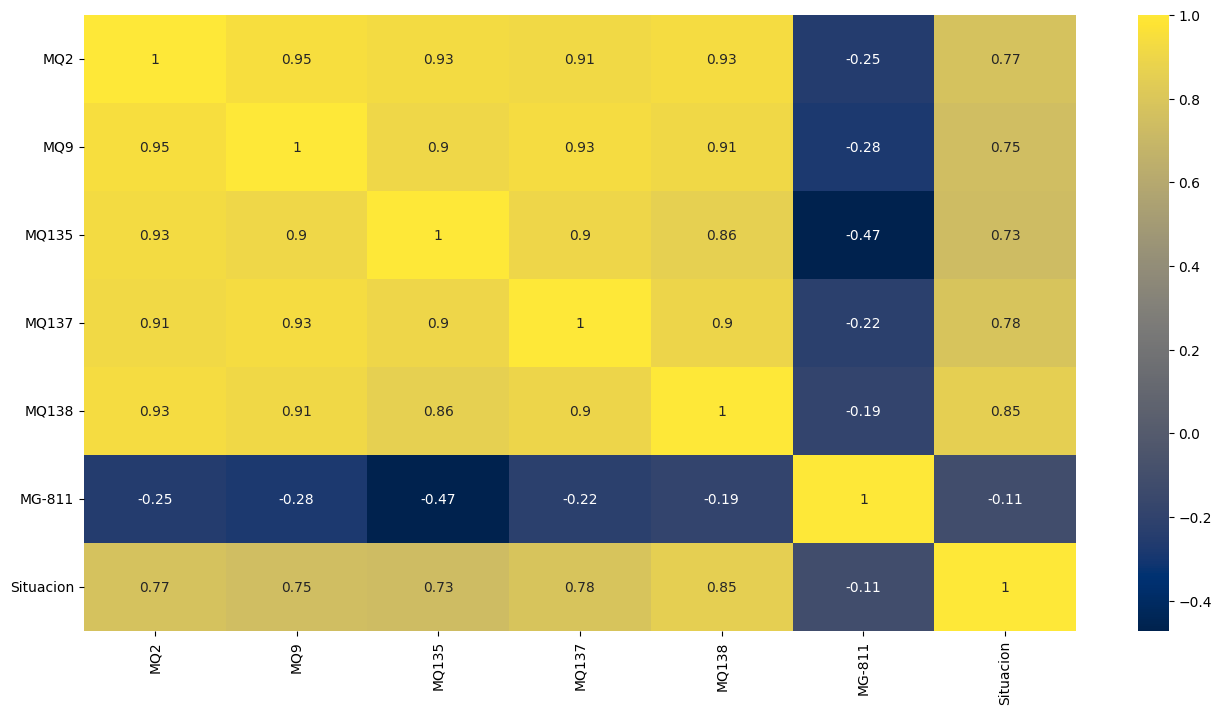

In [9]:
sns.heatmap(data=dataset.corr(), annot=True, cmap="cividis")  # Con cmap podemos cambiar la paleta de colores para el mapeo en la escala, hay un montón pre-fabricadas, puse el más feo de ejemplo ;)

fig=plt.gcf()
fig.set_size_inches(16,8)

plt.show()
# Podemos ver que las variables están bastantes correlacionadas, con esta información podemos tomar decisiones importantes

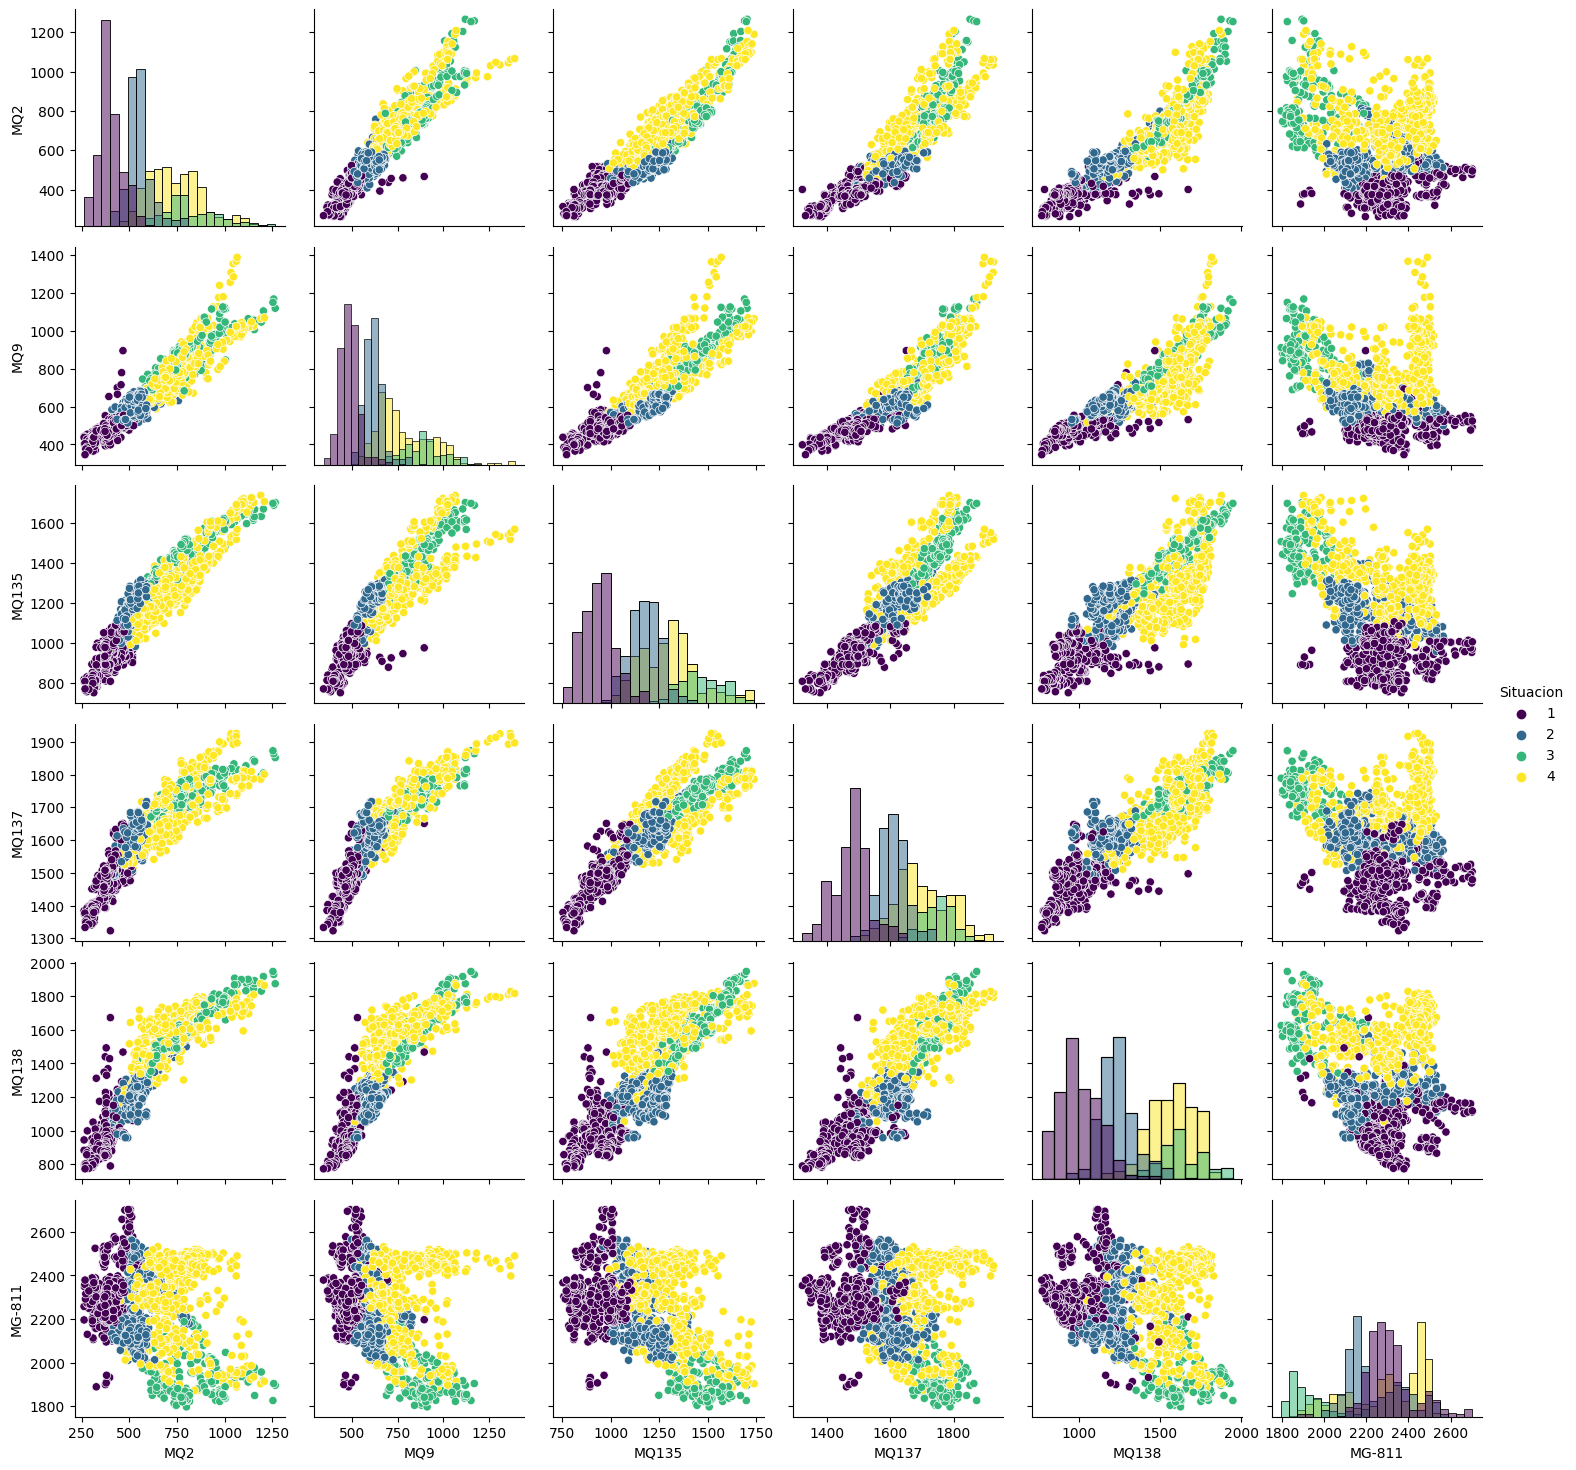

In [10]:
g = sns.PairGrid(dataset, hue="Situacion", palette='viridis')   # Con palette seteamos paleta de colores también
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
# Acá simplemente graficamos para todas las variables del dataset, podemos sacar mucha información
# Hay 1845 muestras, va a tardar un poco (30 s aprox.), ya se comparan todas las posibidades variable-variable respecto a las salidas

## AutoEDA

Podríamos sacar algo más en el análisis...

In [11]:
!pip install ydata-profiling

In [12]:
from ydata_profiling import ProfileReport  # A veces algunas dependencias generan problemas, en ese caso... reiniciar kernel para que se apliquen los cambios
                                           # del pip. Por eso soy más partidario de tener un notebook aparte para este tipo de herramientas automatizadas.

El informe de creación de perfiles permite buscar valores atípicos, valores faltantes y distribuciones. Podemos ver si los datos están desequilibrados. Por lo general, te notifica respecto a una situación a atender (correlaciones altas por ejemplo)

In [13]:
%%time
profile = ProfileReport(dataset,
                        title="Análisis de la Calidad del Aire",
                        dataset={"description": "Esta es una descriptión del dataset...",
                                 "copyright_holder": "Ing. Axel Skrauba",
                                 "copyright_year": "2023",
                                },
                        explorative=True,
                       )
profile

Output hidden; open in https://colab.research.google.com to view.

In [14]:
profile.to_file("reporte_EDA.html")   # Genera un html descargable, con toda la dinámica

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Preprocesamiento

In [15]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset['Situacion']
X = dataset.drop('Situacion', axis=1)

# Acá iría algún tratamiento especial según lo analizado (después lo vemos)

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
                        # shuffle mezcla el dataset, si miramos el csv... están bastante agrupados por categorías
                        # random_state establece una semilla para el mezclador, así se garantiza repetibilidad
                        # test_size establece el tamaño porcentual para el subset de test

## Selección del Modelo

**Comparación de Clasificadores**


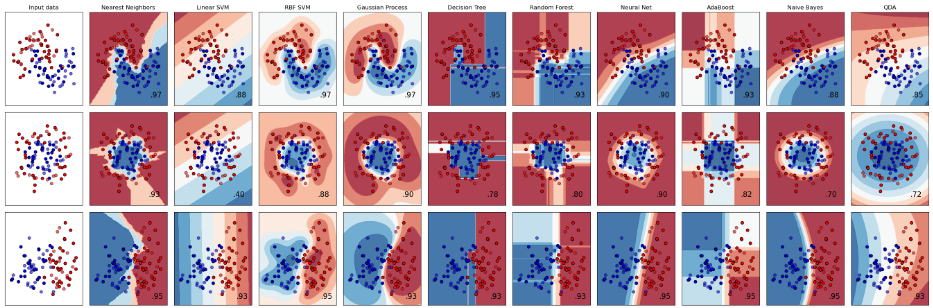

Importación de funciones para métricas generales y construcción de un dataframe para comparar el desempeño de los modelos utilizados.

### Importaciones y funciones comunes

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

import time

# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

Para detalles y demás: https://scikit-learn.org/stable/supervised_learning.html

In [17]:
def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]


def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

### Regresión Logística

In [18]:
from sklearn.linear_model import LogisticRegression

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.91      0.90       179
           2       0.83      0.80      0.82       157
           3       0.77      0.84      0.80        51
           4       0.88      0.86      0.87       167

    accuracy                           0.86       554
   macro avg       0.84      0.85      0.85       554
weighted avg       0.86      0.86      0.86       554

#######################################
Accuracy: 85.74%
Recall: 85.74%
Precision: 85.79%
F1-Score: 85.73%
MCC: 80.15%
Tiempo de entrenamiento: 0.2113 s
Tiempo de predicción: 0.0085 s
Tiempo total: 0.2199 s
#######################################


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


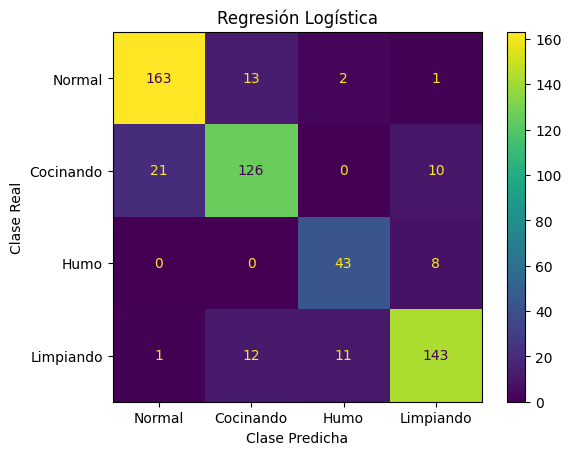

In [19]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Regresión Logística")

### Árbol de Decisión

In [20]:
from sklearn.tree import DecisionTreeClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95       179
           2       0.91      0.88      0.89       157
           3       0.75      0.82      0.79        51
           4       0.89      0.88      0.89       167

    accuracy                           0.90       554
   macro avg       0.87      0.88      0.88       554
weighted avg       0.90      0.90      0.90       554

#######################################
Accuracy: 89.89%
Recall: 89.89%
Precision: 90.01%
F1-Score: 89.93%
MCC: 85.93%
Tiempo de entrenamiento: 0.0257 s
Tiempo de predicción: 0.0024 s
Tiempo total: 0.0281 s
#######################################


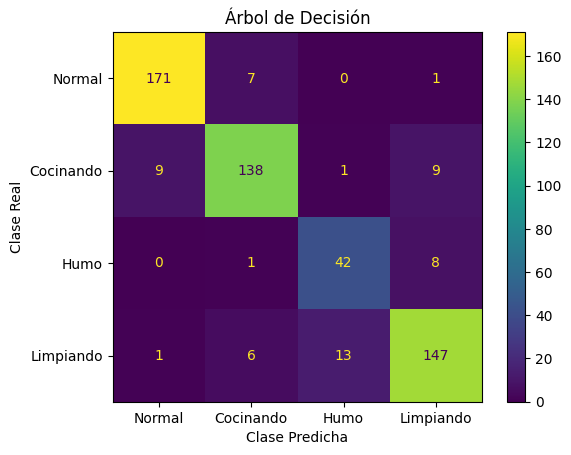

In [21]:
plot_confusion_matrix(y_test, pred_tree, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Árbol de Decisión")

### K Vecinos Cercanos

In [22]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97       179
           2       0.93      0.95      0.94       157
           3       0.89      0.96      0.92        51
           4       0.96      0.92      0.94       167

    accuracy                           0.95       554
   macro avg       0.94      0.95      0.94       554
weighted avg       0.95      0.95      0.95       554

#######################################
Accuracy: 94.77%
Recall: 94.77%
Precision: 94.84%
F1-Score: 94.77%
MCC: 92.73%
Tiempo de entrenamiento: 0.0111 s
Tiempo de predicción: 0.0979 s
Tiempo total: 0.1090 s
#######################################


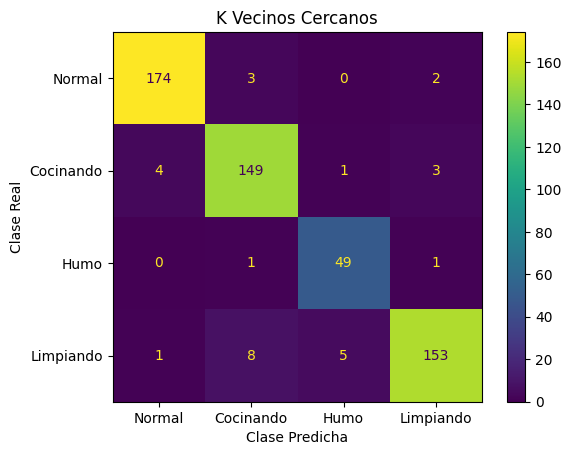

In [23]:
plot_confusion_matrix(y_test, pred_knn, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="K Vecinos Cercanos")

### eXtreme Gradient Boosting (XGB)

In [24]:
# Si aparece: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]
# Significa que este clasificador necesita que la codificación de las clases de salida comiencen por 0
# Esta transformación la podemos realizar de manera sencilla

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

# El la salida para test también debería de transformarse, sino se comprara cosas distintas
y_test_transformed = le.transform(y_test)  # IMPORTANTE: solamente se transforma para test, el cómo transformar ya se definió con los datos de train

In [25]:
from xgboost import XGBClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
xgbc_clf = XGBClassifier()
xgbc_clf.fit(X_train, y_train_transformed)
end_train = time.time()

# Predicciones
pred_xgbc = xgbc_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test_transformed, pred_xgbc))
muestra_metricas("XGBClassifier", y_test_transformed, pred_xgbc, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       179
           1       0.97      0.96      0.96       157
           2       0.86      0.94      0.90        51
           3       0.96      0.93      0.95       167

    accuracy                           0.96       554
   macro avg       0.94      0.95      0.95       554
weighted avg       0.96      0.96      0.96       554

#######################################
Accuracy: 95.85%
Recall: 95.85%
Precision: 95.94%
F1-Score: 95.87%
MCC: 94.23%
Tiempo de entrenamiento: 0.5995 s
Tiempo de predicción: 0.0460 s
Tiempo total: 0.6455 s
#######################################


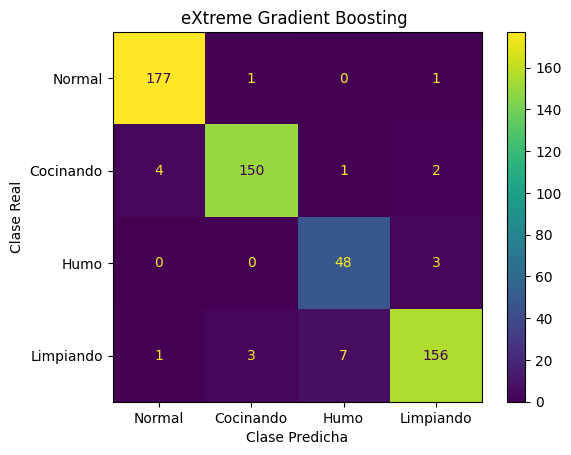

In [26]:
plot_confusion_matrix(y_test_transformed, pred_xgbc, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="eXtreme Gradient Boosting ")

### Red Neuronal

In [27]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((50,))   # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.90      0.89       179
           2       0.85      0.73      0.78       157
           3       0.83      0.67      0.74        51
           4       0.79      0.92      0.85       167

    accuracy                           0.84       554
   macro avg       0.84      0.81      0.82       554
weighted avg       0.84      0.84      0.84       554

#######################################
Accuracy: 83.75%
Recall: 83.75%
Precision: 83.95%
F1-Score: 83.51%
MCC: 77.39%
Tiempo de entrenamiento: 1.7467 s
Tiempo de predicción: 0.0141 s
Tiempo total: 1.7607 s
#######################################


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


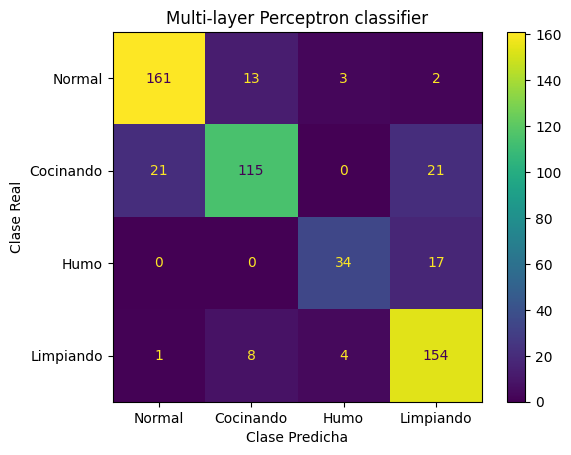

In [28]:
plot_confusion_matrix(y_test, pred_nn, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Multi-layer Perceptron classifier")

### Support Vector Machines (SVMs)

https://scikit-learn.org/stable/modules/svm.html#classification


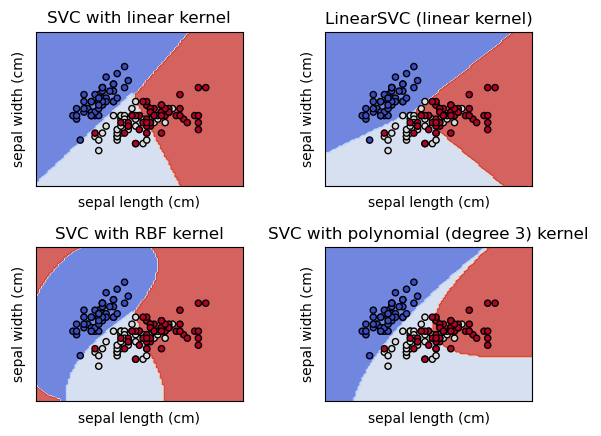

In [29]:
from sklearn.svm import SVC

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_svm = svm_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm))
muestra_metricas("SVM", y_test, pred_svm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.91      0.92      0.92       179
           2       0.83      0.82      0.82       157
           3       0.66      0.78      0.71        51
           4       0.85      0.79      0.82       167

    accuracy                           0.84       554
   macro avg       0.81      0.83      0.82       554
weighted avg       0.84      0.84      0.84       554

#######################################
Accuracy: 84.12%
Recall: 84.12%
Precision: 84.43%
F1-Score: 84.19%
MCC: 77.97%
Tiempo de entrenamiento: 0.0984 s
Tiempo de predicción: 0.0433 s
Tiempo total: 0.1417 s
#######################################


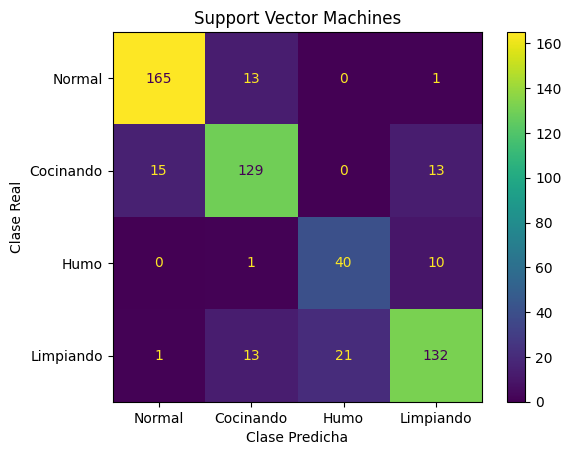

In [30]:
plot_confusion_matrix(y_test, pred_svm, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Support Vector Machines")

### Comparación de los Modelos

Para evaluar qué modelo se ajusta mejor a nuestros requerimientos.
Por ejemplo, si la velocidad de inferencia es crucial (tiempo en la consulta del modelo)... nos interesaría el menor tiempo a la hora de predecir.

In [31]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
LogisticRegression,85.74%,85.74%,85.79%,85.73%,80.15%,0.211,0.009,0.220
DecisionTreeClassifier,89.89%,89.89%,90.01%,89.93%,85.93%,0.026,0.002,0.028
KNeighborsClassifier,94.77%,94.77%,94.84%,94.77%,92.73%,0.011,0.098,0.109
XGBClassifier,95.85%,95.85%,95.94%,95.87%,94.23%,0.599,0.046,0.645
Multi-layer Perceptron classifier,83.75%,83.75%,83.95%,83.51%,77.39%,1.747,0.014,1.761
SVM,84.12%,84.12%,84.43%,84.19%,77.97%,0.098,0.043,0.142


### **Importancia de las características para el modelo**

**Importancia de las características para el modelo**

***SHAP (SHapley Additive exPlanations)***

SHAP es un enfoque teórico de juegos para explicar el resultado de cualquier modelo de aprendizaje automático. Conecta la asignación óptima de créditos con explicaciones locales utilizando los valores clásicos de Shapley de la teoría de juegos y sus extensiones relacionadas.

In [32]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.7 MB/s eta 0:00:00


In [33]:
import shap         # https://shap.readthedocs.io/en/latest/

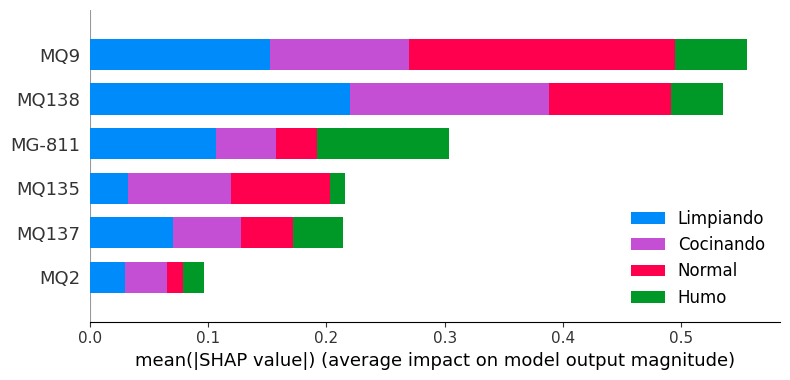

In [34]:
# Para modelos basados en Árboles
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Normal", "Cocinando", "Humo", "Limpiando"])

[18:52:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


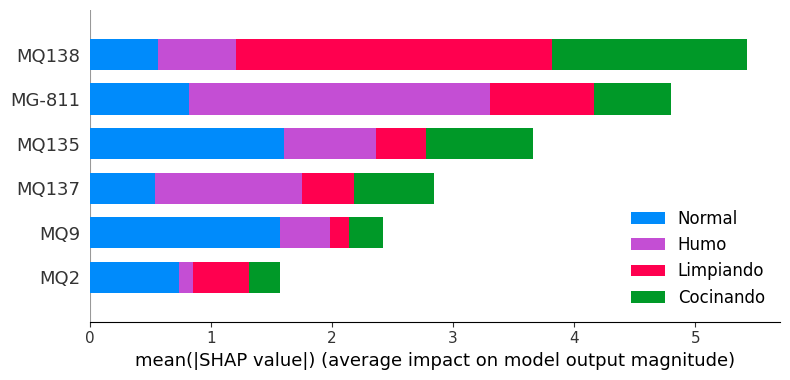

In [35]:
explainer = shap.TreeExplainer(xgbc_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Normal", "Cocinando", "Humo", "Limpiando"])

## Desempeño sin las características poco importantes identificadas

In [36]:
dataset_opt = dataset.copy()

In [37]:
dataset_opt.drop(['MQ2', 'MQ137'], axis=1, inplace=True)

In [38]:
dataset_opt

,MQ9,MQ135,MQ138,MG-811,Situacion
0,696,1252,1321,2431,4
1,674,1156,1410,2433,4
2,646,1159,1455,2361,4
3,590,1105,1459,2427,4
4,627,1192,1466,2447,4
...,...,...,...,...,...
1840,826,1564,1540,2037,4
1841,821,1571,1543,2008,4
1842,832,1582,1545,1989,4
1843,840,1587,1538,1986,4


In [39]:
# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset_opt.pop('Situacion')
X = dataset_opt

# Acá iría algún tratamiento especial según lo analizado (después lo vemos)

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

### KNN, 4 características

In [40]:
# Entrenamiento
knn_clf_3c = KNeighborsClassifier()
knn_clf_3c.fit(X_train, y_train)

# Predicciones
pred_knn_3c = knn_clf_3c.predict(X_test)

print("Classification Report: \n", classification_report(y_test, pred_knn_3c))

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.98      0.97       179
           2       0.92      0.96      0.94       157
           3       0.81      0.90      0.85        51
           4       0.96      0.87      0.92       167

    accuracy                           0.94       554
   macro avg       0.91      0.93      0.92       554
weighted avg       0.94      0.94      0.94       554



Traigo a colación el reporte del KNN con todos los predictores:                                              

```
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97       179
           2       0.93      0.95      0.94       157
           3       0.89      0.96      0.92        51
           4       0.96      0.92      0.94       167

    accuracy                           0.95       554
   macro avg       0.94      0.95      0.94       554
weighted avg       0.95      0.95      0.95       554
```
Usamos 4 de los 6 sensores, el rendimiento sigue siendo prácticamente igual, incluso un poco mejor en algunos casos.

Comparamos abajo las matrices de confusión para decidir:

In [41]:
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

labels=["Normal", "Cocinando", "Humo", "Limpiando"]

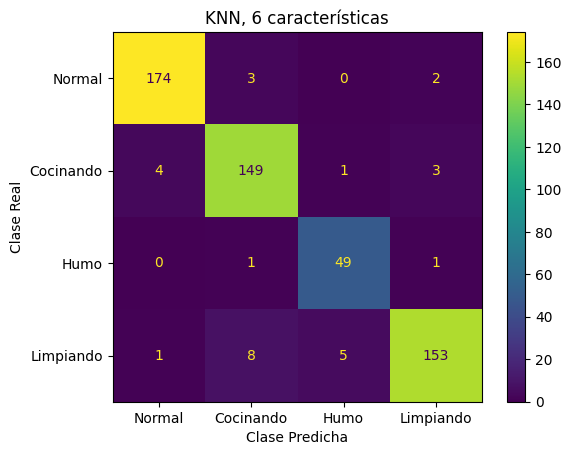

In [42]:
plot_confusion_matrix(y_test, pred_knn, labels=labels, model_name="KNN, 6 características")

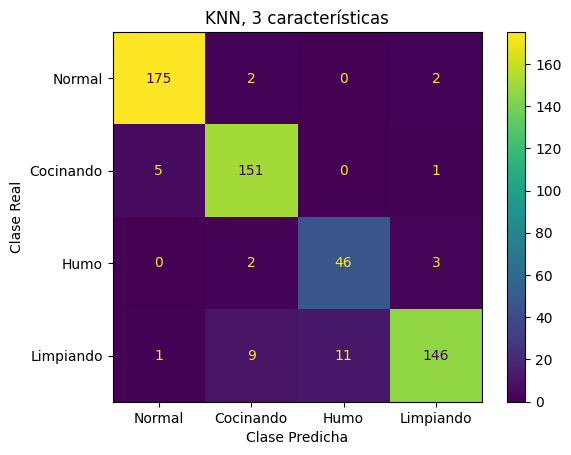

In [43]:
plot_confusion_matrix(y_test, pred_knn_3c, labels=labels, model_name="KNN, 3 características")

### Árboles, 4 características

In [44]:
# Entrenamiento
tree_clf_opt = DecisionTreeClassifier(random_state=1, max_depth=6)
tree_clf_opt.fit(X_train, y_train)

# Predicciones
pred_tree_opt = tree_clf_opt.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree_opt))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95       179
           2       0.87      0.90      0.88       157
           3       0.67      0.75      0.70        51
           4       0.88      0.80      0.83       167

    accuracy                           0.87       554
   macro avg       0.84      0.85      0.84       554
weighted avg       0.88      0.87      0.87       554



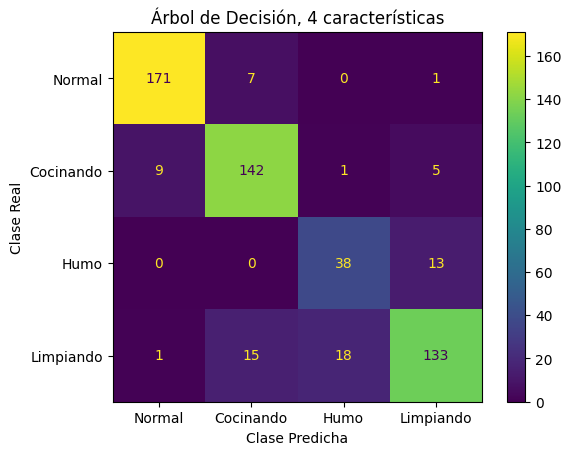

In [45]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree_opt, labels=labels, model_name="Árbol de Decisión, 4 características")

In [46]:
tree_clf_opt.feature_importances_   # Este modelo permite saber la importancia que le dio a cada característica durante el ajuste de sus pesos.
                                    # No hace falta otro método, es otra de las ventajas de los árboles
                                    # Está porcentual la salida. Y se corresponde con el orden de las características del arreglo de entrada.

array([0.4259595 , 0.06567681, 0.28997618, 0.21838751])

In [47]:
# El orden de las columnas de X (vector entrada) es el orden de los números del vector de importancia
dataset_opt.columns

Index(['MQ9', 'MQ135', 'MQ138', 'MG-811'], dtype='object')

Así suelto, podría complicarse para casos con muchas características pero... podemos armar una tablita y ordenar por valores.

In [48]:
df_importances = pd.DataFrame({
    'Variables': dataset_opt.columns,
    'Importancia DTC': tree_clf_opt.feature_importances_,
})

df_importances.sort_values(by='Importancia DTC', ascending=False)

,Variables,Importancia DTC
0,MQ9,0.425959
2,MQ138,0.289976
3,MG-811,0.218388
1,MQ135,0.065677


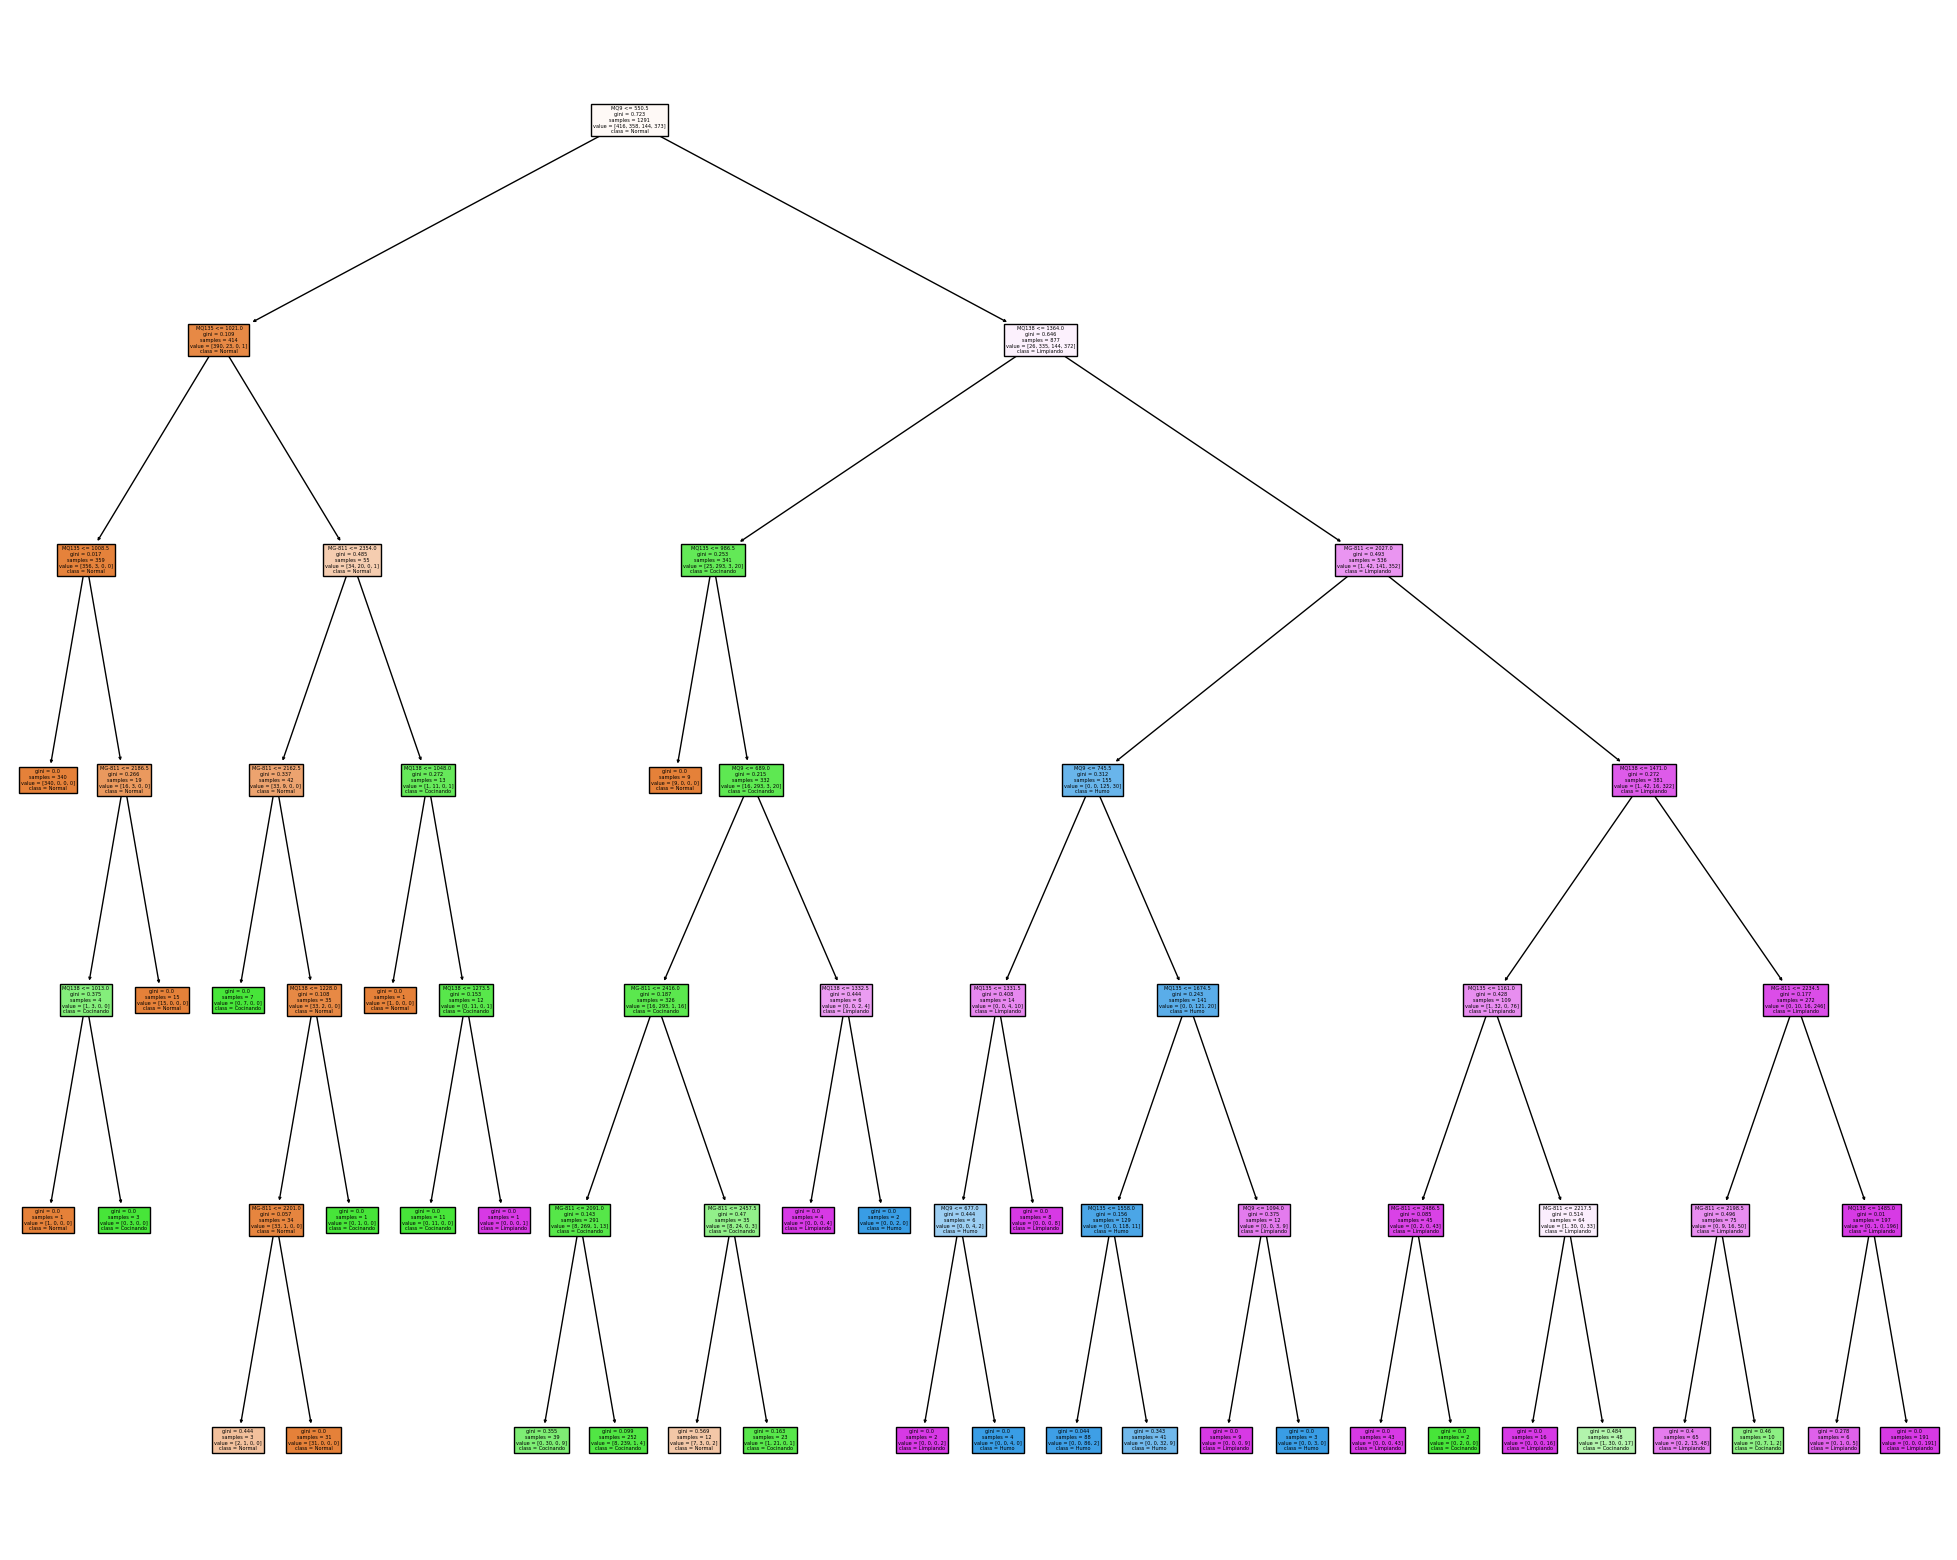

In [49]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))   # Configuramos un tamaño mayor, para poder ver algo
_ = tree.plot_tree(tree_clf_opt,
                        feature_names=dataset_opt.columns,
                        class_names=labels,
                        filled=True)
fig.savefig("decision_tree_opt.png")  # Guardamos la imagen también, por si se necesita

¿Es correcto que se haga tantas preguntas?

Y acá aparece una desventaja, si le dejamos... crece sin límites, se hace tantas preguntas rebuscadas que entra en sobreajuste con los datos.

**Hay muchísimas ramas que están para UNA sola clase de salida.**

# Meta-Clasificadores (Bagging, Stacking)

Los meta-clasificadores son técnicas que combinan múltiples modelos para mejorar el rendimiento. Bagging (Bootstrap Aggregating) es un método de ensemble learning que crea múltiples modelos a partir de distintas muestras  del conjunto de datos original y luego promedia sus predicciones.

**Concepto**

El Bagging funciona generando múltiples versiones de un modelo base, entrenando cada modelo en un subconjunto aleatorio de los datos de entrenamiento. Luego se hace un promedio/votación de las predicciones de todos los modelos para obtener una predicción final más robusta.

**Ventajas**

* Reduce la varianza al promediar predicciones de modelos diversos entrenados en distintos subsets de datos.
* Mejora el rendimiento de modelos inestables como árboles de decisión (tienden a sobre-ajustarse).
* Es un ensemble learning simple de implementar.
* Es aplicable a muchos tipos de modelos base, no solo árboles.


**Ejemplos de algoritmos Bagging:**

* Random Forest: conjunto de árboles de decisión entrenados en distintas muestras bootstrap.
* AdaBoost: entrena modelos secuencialmente, asignando más peso a instancias mal clasificadas.

## Un Poco de Teoría y Contexto

Estos algoritmos pertenecen a una clase de algoritmos de aprendizaje automático conocidos como algoritmos de aprendizaje de conjunto. El aprendizaje de conjunto implica combinar las predicciones de múltiples modelos en uno en un intento de aumentar el rendimiento de predicción.

### Bagging,

En el Bagging, primero muestreamos subconjuntos de datos de igual tamaño de un conjunto de datos con bootstrapping, es decir, muestreamos con reemplazo. Luego, usamos esos subconjuntos para entrenar varios modelos débiles de forma independiente. Un modelo débil es uno con baja precisión de predicción. En contraste, los modelos fuertes son muy precisos. Para obtener un modelo fuerte, agregamos las predicciones de todos los modelos débiles:

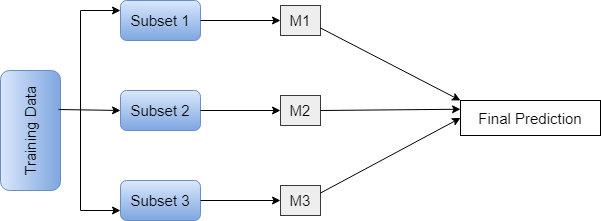

Entonces, hay tres pasos:

* Muestrear subconjuntos de igual tamaño con reemplazo
* Entrenar modelos débiles en cada uno de los subconjuntos de forma independiente y en paralelo
* Combinar los resultados de cada uno de los modelos débiles promediando o votando para obtener un resultado final

Los resultados se obtienen promediando los diferentes resultados para problemas de regresión tareas o eligiendo la clase mayoritaria en problemas de clasificación.

La idea principal detrás del bagging es reducir la varianza en un conjunto de datos, asegurando que el modelo global sea robusto y no está influenciado por muestras específicas en el conjunto de datos

### Stacking

En el Stacking, las predicciones de los modelos base se alimentan como entrada a un meta-modelo (o meta-learner). El trabajo del meta-modelo es tomar las predicciones de los modelos base y hacer una predicción final:

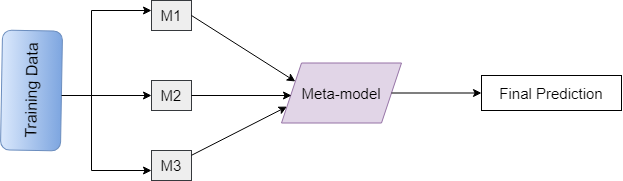

La base y los meta-modelos no tienen que ser del mismo tipo. Por ejemplo, podemos emparejar un árbol de decisión con un máquina de vector de soporte (SVM).

Los pasos serían:

* Construir modelos de base en diferentes partes de los datos de entrenamiento
* Entrenar un meta-modelo sobre las predicciones de los modelos base

### Boosting

Al aplicar Boosting, entrenamos una secuencia de modelos. Cada modelo está capacitado en un conjunto de entrenamiento ponderado. Asignamos pesos basados en los errores de los modelos anteriores en la secuencia.

La idea principal detrás del entrenamiento secuencial es hacer que cada modelo corrija los errores de su predecesor. Esto continúa hasta que se haya capacitado el número predefinido de modelos o se cumplan algunos otros criterios.

Durante el entrenamiento, a las instancias que se clasifican incorrectamente se les asignan pesos más altos para dar alguna forma de prioridad cuando se entrenan con el siguiente modelo:



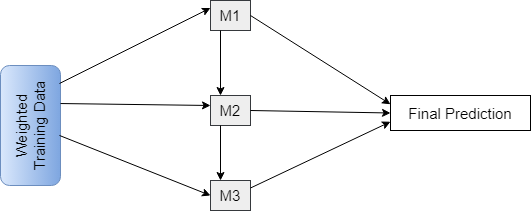

Además, a los modelos más débiles se les asignan pesos más bajos que a los modelos fuertes al combinar sus predicciones en la salida final.

Entonces, primero inicializamos los pesos de datos al mismo valor y luego realizamos los siguientes pasos iterativamente:

* Entrenar un modelo en todas las instancias
* Calcular el error en la salida del modelo en todas las instancias
* Asignar un peso al modelo (alto para un buen rendimiento y viceversa)
* Actualizar pesos de datos: dar pesos más altos a muestras con altos errores
* Repetir los pasos anteriores si el rendimiento no es satisfactorio u se cumplen otras condiciones de parada

Finalmente, se combinan los modelos para obtener el que se usará para las predicciones.

El Boosting generalmente mejora la precisión de un modelo de aprendizaje automático al mejorar el rendimiento de los alumnos débiles. Usualmente se utiliza: XGBoost, CatBoost, y AdaBoost.

Estos algoritmos aplican diferentes técnicas de refuerzo y son más conocidos por lograr un rendimiento excelente.

Arriba implementamos ya **eXtreme Gradient Boosting (XGB)**.  XGBoost es una implementación de árboles de decisión con *Gradient boosting* diseñado para minimizar la velocidad de ejecución y maximizar el rendimiento.

Referencias:
* [XGBoost](https://arxiv.org/abs/1603.02754)
* [CatBoost](https://arxiv.org/abs/1706.09516)
* [AdaBoost](https://www.matec-conferences.org/articles/matecconf/abs/2017/53/matecconf_icmite2017_00222/matecconf_icmite2017_00222.html)




La selección de la técnica a utilizar depende del objetivo general y la tarea en cuestión. El **bagging** es mejor cuando el objetivo es reducir la varianza, mientras que el **boosting** es la opción para reducir el sesgo. Si el objetivo es reducir la varianza y el sesgo y mejorar el rendimiento general, debemos usar el **stacking**.

## Ejemplo ya implementado: Random Forest (Si puedo tener un Árbol, puedo tener un bosque)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predicciones
pred_rf = rf_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_rf))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97       179
           2       0.93      0.93      0.93       157
           3       0.76      0.92      0.83        51
           4       0.94      0.87      0.90       167

    accuracy                           0.92       554
   macro avg       0.90      0.92      0.91       554
weighted avg       0.93      0.92      0.92       554



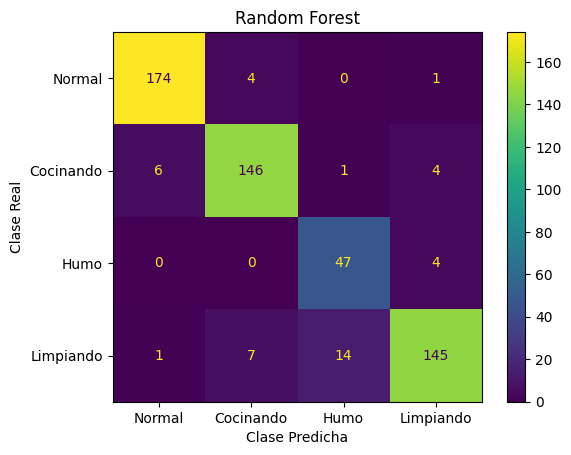

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_rf, labels=labels, model_name="Random Forest")

## Ejemplo con BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Esto sería casi lo que implementa RandomForest, un conjunto de varios árboles
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True
)

"""
Esto entrena 500 árboles de decisión, donde cada árbol se entrena en un
subconjunto aleatorio del 25% de las muestras (con reemplazo).
Luego se promedian las predicciones para obtener y_pred más robusto.
"""

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, y_pred_bag))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           1       0.95      0.96      0.95       179
           2       0.90      0.90      0.90       157
           3       0.74      0.88      0.80        51
           4       0.91      0.85      0.88       167

    accuracy                           0.90       554
   macro avg       0.88      0.90      0.88       554
weighted avg       0.91      0.90      0.90       554



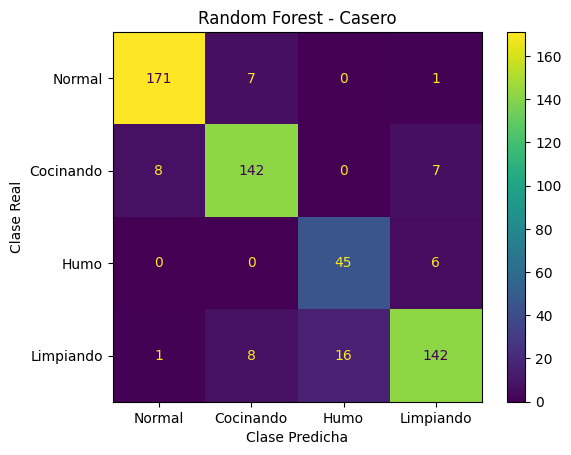

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, y_pred_bag, labels=labels, model_name="Random Forest - Casero")

## Ejemplo con múltiples clasificadores (Stacking)

Para obtener un modelo que combine varios modelos, podemos utilizar un enfoque de ensamblado llamado "Stacking" (apilamiento). El apilamiento es un meta-ensamblaje que combina múltiples modelos base para mejorar el rendimiento de la predicción.

Es como tener la junta directiva de especialistas reunidos, cada uno hace lo suyo, pero en conjunto "saben más/mucho".

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear modelos base (en este ejemplo, un árbol de decisión, un SVM y un k-NN)
base_model_1 = DecisionTreeClassifier()
base_model_2 = SVC()
base_model_3 = KNeighborsClassifier()

# Crear un StackingClassifier  con los modelos base
stacking_model = StackingClassifier(estimators=[('DT', base_model_1), ('SVM', base_model_2), ('KNN', base_model_3)])

# Entrenar el BaggingClassifier en los datos de entrenamiento
stacking_model.fit(X_train, y_train)

# Predict
y_pred_stm = stacking_model.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, y_pred_stm))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           1       0.95      0.99      0.97       179
           2       0.97      0.94      0.95       157
           3       0.80      0.92      0.85        51
           4       0.96      0.90      0.93       167

    accuracy                           0.94       554
   macro avg       0.92      0.94      0.93       554
weighted avg       0.94      0.94      0.94       554



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


El *StackingClassifier* combina las predicciones de los modelos base y utiliza el meta-estimador para hacer la predicción final.

Este enfoque de apilamiento a menudo conduce a un mejor rendimiento predictivo en comparación con el uso de modelos individuales.

El meta-clasificador se define con el argumento `final_estimator`, por defecto es **LogisticRegression**.

In [ ]:
stacking_model

StackingClassifier(estimators=[('DT', DecisionTreeClassifier()), ('SVM', SVC()),
                               ('KNN', KNeighborsClassifier())])

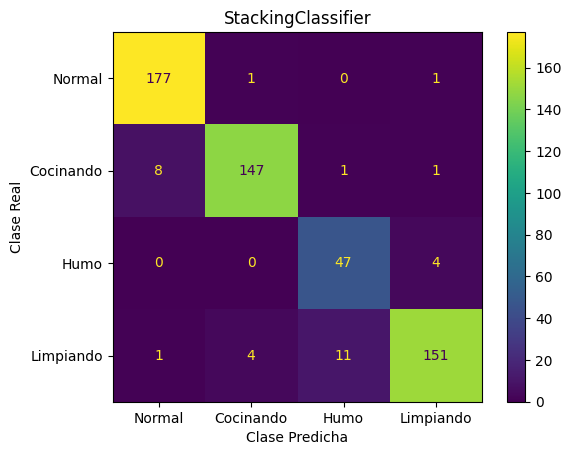

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, y_pred_stm, labels=labels, model_name="StackingClassifier")

# Plus: LazyPredict

Cuando nos enfrentamos a un proyecto de *Machine Learning*, tenemos que hacer un análisis de datos e intentar escoger el modelo/modelos que mejor se ajusten a nuestro dataset. Que como ya sabemos, no todos los modelos son óptimos para todo tipo de datos.

Van unos ejemplos:

* Para datos con una relación lineal funcionan bien los modelos lineales como la regresión logística, regresión lineal etc.
* Para datos con la mayoría de variables continuas son buenos los modelos como Gaussian Naive Bayes, regresiones lineales, SVM…
* Para datos un poco más "caóticos" podemos intentar algoritmos por árboles como Random Forest, algoritmos por boosting como GBM o el xGBoost etc.

Aquí es donde entra en juego esta librería y otras tantas con el mismo objetivo. *LazyPredict* nos permite, con una línea, lanzar una barbaridad de modelos de scikit-Learn con los parámetros por defecto para ver el rendimiento de cada uno de ellos. Esto nos da la ventaja de ver el rendimiento de cada uno de ellos para nuestros datos y poder enfocarnos en optimizar, agrupar, intervenir aquellos que mejor funcionan para nuestros datos.

Librería: https://lazypredict.readthedocs.io/en/latest/index.html

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf_lazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf_lazy.fit(X_train, X_test, y_train, y_test)
models

 90%|████████▉ | 26/29 [00:06<00:00,  9.75it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1291, number of used features: 4
[LightGBM] [Info] Start training from score -1.132487
[LightGBM] [Info] Start training from score -1.282639
[LightGBM] [Info] Start training from score -2.193359
[LightGBM] [Info] Start training from score -1.241594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

100%|██████████| 29/29 [00:06<00:00,  4.51it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.96,None,0.96,1.15
KNeighborsClassifier,0.94,0.95,None,0.94,0.14
LabelPropagation,0.94,0.94,None,0.94,0.30
LabelSpreading,0.94,0.94,None,0.94,0.46
LGBMClassifier,0.94,0.94,None,0.94,0.39
RandomForestClassifier,0.93,0.92,None,0.93,0.33
BaggingClassifier,0.92,0.91,None,0.92,0.25
DecisionTreeClassifier,0.91,0.89,None,0.91,0.14
ExtraTreeClassifier,0.90,0.88,None,0.90,0.07


In [ ]:
knn_lazy = clf_lazy.models.get("KNeighborsClassifier")    # Recupero el modelo que me interesa...

In [ ]:
# Si miramos el modelo, vamos a ver que hay otras cosas metidas. Más adelante vemos un poco qué esto es Pipelines y demás
knn_lazy

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MQ9', 'MQ135', 'MQ138', 'MG-811'], dtype='object')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

# ¿Qué funciona o se usa en la actualidad?

Una excelente manera de tener una idea del panorama actual de los algoritmos y herramientas de aprendizaje automático es observar las competencias de aprendizaje automático en Kaggle. Debido a su entorno altamente competitivo (algunos concursos tienen miles de participantes y premios millonarios) y a la amplia variedad de problemas de aprendizaje automático cubiertos, Kaggle ofrece una forma realista de evaluar qué funciona y qué no. Entonces, ¿qué tipo de algoritmo gana competiciones de forma fiable? ¿Qué herramientas utilizan los mejores participantes? A principios de 2019, Kaggle realizó una encuesta preguntando a los equipos que terminaron entre los cinco primeros de cualquier competencia desde 2017 qué herramienta de software principal habían utilizado en la competencia (ver figura 1.12). Resulta que los mejores equipos tienden a utilizar métodos de aprendizaje profundo (con mayor frecuencia a través de la biblioteca Keras) o árboles potenciados por gradiente (con mayor frecuencia a través de las bibliotecas LightGBM o XGBoost).

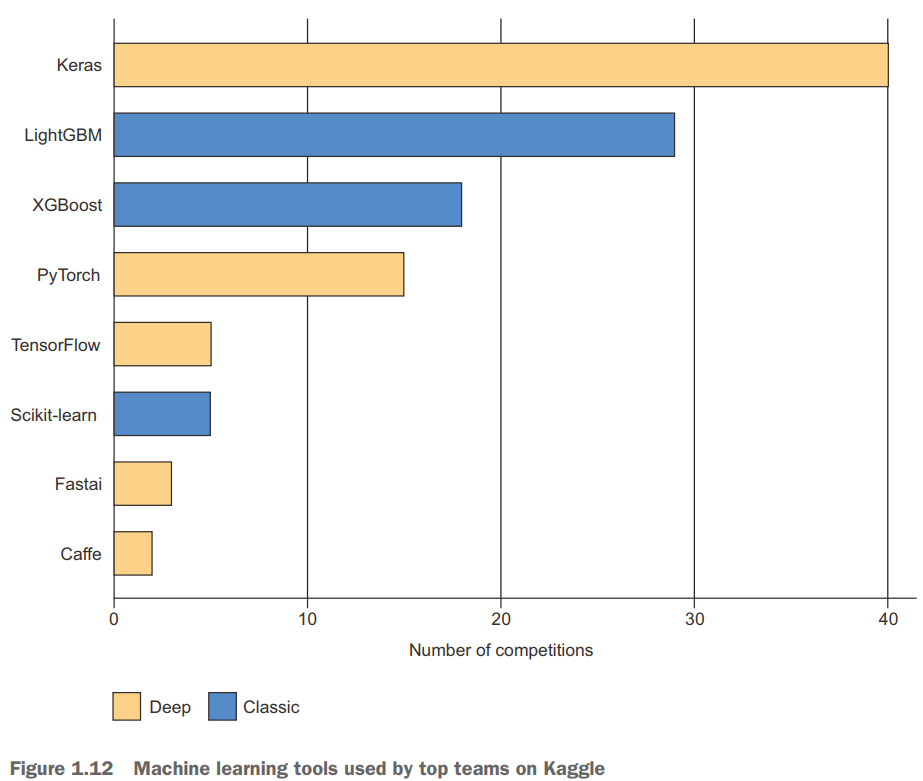

Tampoco se trata sólo de campeones de competición. Kaggle también realiza una encuesta anual entre profesionales del aprendizaje automático y la ciencia de datos de todo el mundo. Con decenas de miles de encuestados, esta encuesta es una de nuestras fuentes más confiables sobre el estado de la industria. La Figura 1.13 muestra el porcentaje de uso de diferentes *frameworks* de aprendizaje automático.

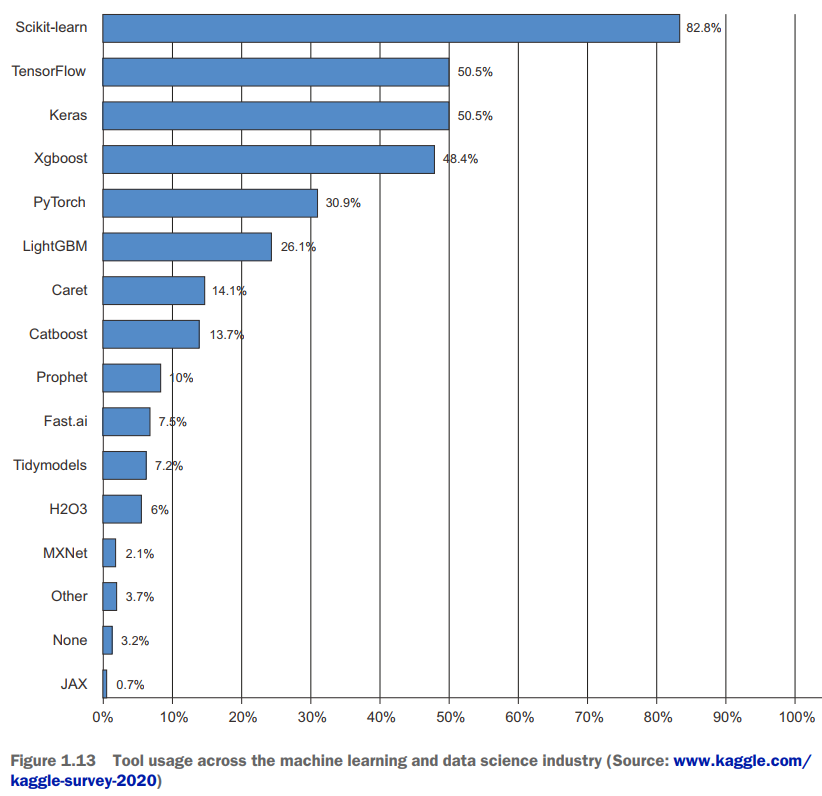

Actualizando a los últimos datos, el panorama sigue claro:

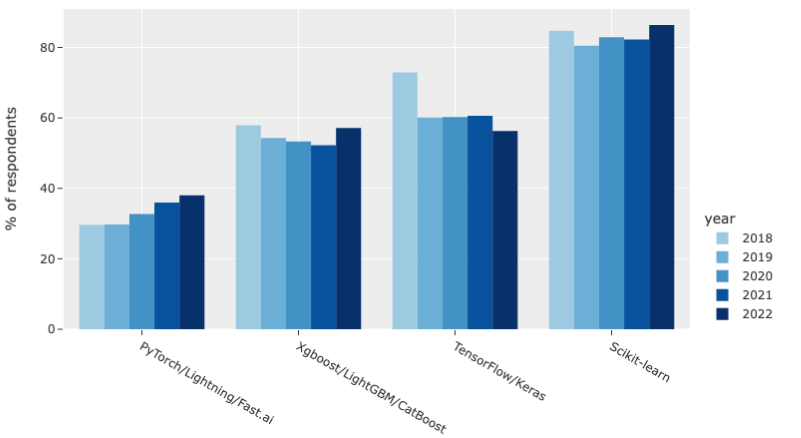

Fuentes:


*   [State of Data Science and Machine Learning 2022](https://www.kaggle.com/kaggle-survey-2022)
*   Deep Learning with Python, second edition. Francois Chollet. 2021



# Referencias y Recursos

*   https://scikit-learn.org/stable/supervised_learning.html
*   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
*   https://lazypredict.readthedocs.io/en/latest/index.html
*   [Bagging, Boosting, and Stacking in Machine Learning](https://www.baeldung.com/cs/bagging-boosting-stacking-ml-ensemble-models)
*   [Lazy Predict’s](https://lazypredict.readthedocs.io/en/latest/)